# Optimizing Ad Engagement Through A/B Testing

This notebook guides you through creating visual insights and dashboards from an A/B test dataset measuring the effects of ad format and personalization on CTR and engagement.

## 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load your dataset
df = pd.read_csv("/content/A:B_Testing_Engagement_Data.csv")
df.head()

,age,gender,location,device_type,ad_format,personalization,impressions,clicks,conversions,engagement_duration,interaction,timestamps,previous_interaction_score,sentiment_score,ctr
0,56,Male,Australia,Desktop,Banner,Static,710,64,6,1.71,2025-05-01,04:23:15,0.85,-0.04,0.0901
1,46,Female,Canada,Desktop,Banner,Dynamic,307,36,5,4.68,2025-05-02,00:14:20,0.06,-0.97,0.1173
2,32,Male,India,Mobile,Banner,Static,107,8,2,35.65,2025-05-03,21:20:20,0.03,0.47,0.0748
3,60,Other,Australia,Mobile,Banner,Dynamic,801,72,12,4.60,2025-05-04,15:14:46,0.26,-0.85,0.0899
4,25,Male,UK,Tablet,Video,Static,786,81,16,30.63,2025-05-05,01:44:25,0.90,0.26,0.1031


# Data Clean & Prep

In [ ]:
df['CTR'] = df['clicks'] / df['impressions']
df['Conversion_Rate'] = df['conversions'] / df['clicks']
df['Engagement_Bin'] = pd.cut(df['engagement_duration'], bins=[0,1,2,3,5,999],
                              labels=['0–1 min', '1–2 min', '2–3 min', '3–5 min', '5+ min'])

# Extract Hour from Timestamps

In [ ]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Hour'] = df['Timestamp'].dt.hour
    df['Day'] = df['Timestamp'].dt.day_name()

##  KPIs Summary

In [ ]:
kpis = {
    "Average CTR": df['CTR'].mean(),
    "Average Engagement Duration": df['engagement_duration'].mean(),
    "Conversion Rate": df['Conversion_Rate'].mean(),
    "Total Impressions": df['impressions'].sum(),
    "Total Clicks": df['clicks'].sum(),
    "Total Conversions": df['conversions'].sum()
    }
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")

Average CTR: 0.10
Average Engagement Duration: 31.41
Conversion Rate: 0.20
Total Impressions: 552532.00
Total Clicks: 55308.00
Total Conversions: 11118.00


## 3. Heat Map Hour vs Day (Avg CTR)

In [ ]:
if 'Hour' in df.columns and 'Day' in df.columns:
    pivot = df.pivot_table(index='Day', columns='Hour', values='CTR', aggfunc='mean')
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title("Avg CTR by Hour and Day")
    plt.show()

## 4. Session Length Distribution

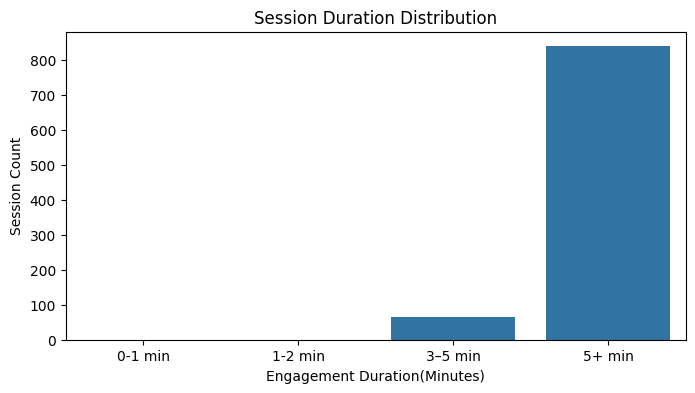

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Engagement_Bin', order=['0-1 min','1-2 min', '3–5 min', '5+ min'])
plt.title("Session Duration Distribution")
plt.xlabel("Engagement Duration(Minutes)")
plt.ylabel("Session Count")
plt.show()

## 5. A/B Test Summary

In [ ]:
ab_summary = df.groupby(['ad_format', 'personalization']).agg({
    'CTR': 'mean',
    'engagement_duration': 'mean',
    'Conversion_Rate': 'mean'
}).reset_index()
print(ab_summary)

  ad_format personalization       CTR  engagement_duration  Conversion_Rate
0    Banner         Dynamic  0.099565            29.985895         0.200625
1    Banner          Static  0.100024            33.825649         0.199807
2     Video         Dynamic  0.101809            29.147558         0.203096
3     Video          Static  0.099031            32.634891         0.203922


## Demographic Breakdown (CTR by Age Group and Gender)

In [ ]:
df['Age_Group'] = pd.cut(df['age'], bins=[0,24,34,44,54,100], labels=['<25', '25-34', '35-44', '45-54', '55+'])
demo_ctrs = df.groupby(['Age_Group', 'gender'])['CTR'].mean().reset_index()
fig = px.bar(demo_ctrs, x='Age_Group', y='CTR', color='gender', barmode='group',title='Avg CTR by Demographics')
fig.show()

/tmp/ipython-input-28-3498593383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_ctrs = df.groupby(['Age_Group', 'gender'])['CTR'].mean().reset_index()


## Funnel Metrics

/tmp/ipython-input-31-3747868216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




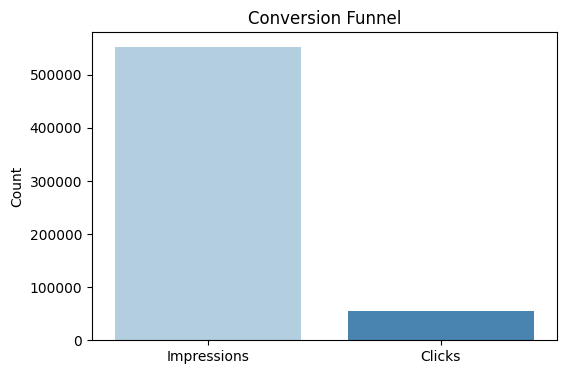

In [ ]:
funnel = {
    "Impressions": df['impressions'].sum(),
     "Clicks": df['clicks'].sum()
     }
plt.figure(figsize=(6,4))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()), palette='Blues')
plt.title("Conversion Funnel")
plt.ylabel("Count")
plt.show()